**Our target variable is Cancer_CrudePrev**

## Data Wrangling

In [0]:
import numpy as np
from numpy import arange
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### Column selection

In [2]:
#https://drive.google.com/file/d/1eY-bA2i49lqpuijooLqQfOHGRp5bEPER/view?usp=sharing
import pandas as pd
url = "https://drive.google.com/uc?export=download&id=1eY-bA2i49lqpuijooLqQfOHGRp5bEPER" 

df_init = pd.read_csv(url, header = 0)
df_tem=df_init[['StateAbbr','PlaceName','PlaceFIPS','Population2010']]
select_cols = df_init.filter(regex='CrudePrev')
df=pd.concat([df_tem,select_cols],axis=1)
df.head()
#data has 500 rows

StateAbbr PlaceName  ...  STROKE_CrudePrev  TEETHLOST_CrudePrev
0        CA    Folsom  ...               1.9                  6.8
1        FL     Largo  ...               4.5                 18.3
2        CA  Berkeley  ...               1.9                  6.7
3        CA      Napa  ...               2.8                 11.2
4        FL   Sunrise  ...               3.7                 16.2

[5 rows x 32 columns]

### Missing data handling

In [0]:
null_data = df[df.isnull().any(axis=1)]
len(null_data)#47
null_data_tem=null_data.drop(columns=['StateAbbr','PlaceName','PlaceFIPS'])
row_name=null_data[['StateAbbr','PlaceName','PlaceFIPS']]
df_tem2=df.drop(null_data.index)
#453 rows without missing data
df_tem2.head()
df2=df_tem2.drop(columns=['StateAbbr','PlaceName','PlaceFIPS'])
df2=df2.astype(float)
df_tem3=pd.concat([df_tem2[['StateAbbr','PlaceName','PlaceFIPS']],df2],axis=1)
mean_tem=pd.DataFrame(df_tem3.drop(columns=['PlaceName','PlaceFIPS']).mean()).transpose()
mean_tem=mean_tem.astype('str')
for col in null_data_tem.columns:
    null_data_tem.loc[:,col]=null_data_tem.loc[:,col].fillna(mean_tem.iloc[0][col])
null_data_tem=null_data_tem.astype('float')
new_null=pd.concat([null_data[['StateAbbr','PlaceName','PlaceFIPS']],null_data_tem],axis=1)
df_new=pd.merge(df_tem3,new_null,how='outer')

In [4]:
row_name.head()

StateAbbr  PlaceName  PlaceFIPS
9         WA     Auburn    5303180
13        WA     Renton    5357745
49        AZ     Tucson     477000
56        AZ    Gilbert     427400
66        WA  Kennewick    5335275

## Data Standardization

In [5]:
df_new.head()

StateAbbr PlaceName  ...  STROKE_CrudePrev  TEETHLOST_CrudePrev
0        CA    Folsom  ...               1.9                  6.8
1        FL     Largo  ...               4.5                 18.3
2        CA  Berkeley  ...               1.9                  6.7
3        CA      Napa  ...               2.8                 11.2
4        FL   Sunrise  ...               3.7                 16.2

[5 rows x 32 columns]

In [6]:
from sklearn.preprocessing import MinMaxScaler
df_new_tem = df_new.drop(columns = ['StateAbbr','PlaceName','PlaceFIPS','Population2010','ARTHRITIS_CrudePrev','BPHIGH_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev','CHD_CrudePrev','COPD_CrudePrev','DIABETES_CrudePrev','HIGHCHOL_CrudePrev','KIDNEY_CrudePrev','MHLTH_CrudePrev','PHLTH_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev'])
x = df_new_tem
min_max_scaler = MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(x)
df_new2 = pd.DataFrame(x_minmax,columns=['ACCESS2_CrudePrev', 'BINGE_CrudePrev', 'BPMED_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev',
       'DENTAL_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'SLEEP_CrudePrev'])
df_new3=pd.concat([df_new[['StateAbbr','PlaceName','PlaceFIPS','Population2010','ARTHRITIS_CrudePrev','BPHIGH_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev','CHD_CrudePrev','COPD_CrudePrev','DIABETES_CrudePrev','HIGHCHOL_CrudePrev','KIDNEY_CrudePrev','MHLTH_CrudePrev','PHLTH_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev']],df_new2],axis=1)
df_new3.head()

StateAbbr PlaceName  ...  PAPTEST_CrudePrev  SLEEP_CrudePrev
0        CA    Folsom  ...           0.733766         0.378906
1        FL     Largo  ...           0.266234         0.527344
2        CA  Berkeley  ...           0.662338         0.312500
3        CA      Napa  ...           0.707792         0.332031
4        FL   Sunrise  ...           0.538961         0.542969

[5 rows x 32 columns]

## Exploratory Data Analysis

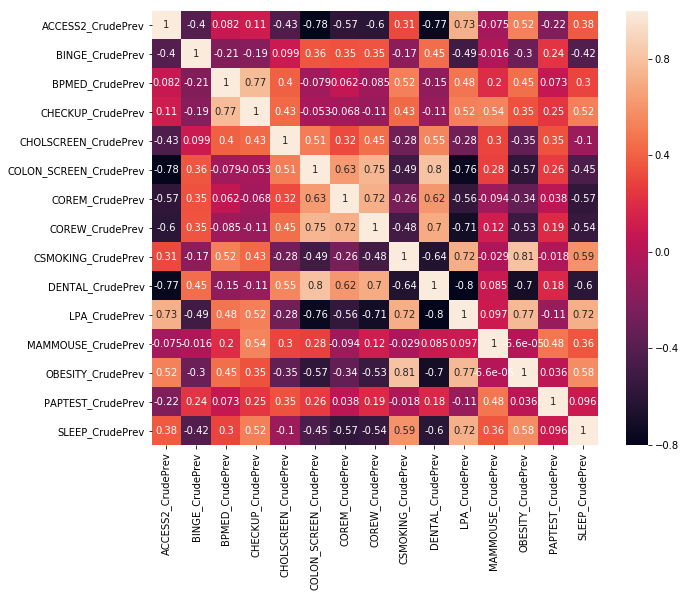

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#Correlation matrix plot,color follows heat map, yellow is 1.
corr=df_new3[['ACCESS2_CrudePrev', 'BINGE_CrudePrev', 'BPMED_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev',
       'DENTAL_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'SLEEP_CrudePrev']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)
#Many variables are highly correlated. BPMED_CrudePrev, MAMMOUSE_CrudePrev, and PAPTEST_CrudePrev do not show much correlation. 
#Whereas the rest of the variables are having either strongly positive or negative correlation among them.

In [8]:
#Descriptive stats
df_new3[['ACCESS2_CrudePrev', 'BINGE_CrudePrev', 'BPMED_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev',
       'DENTAL_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'SLEEP_CrudePrev']].describe()


ACCESS2_CrudePrev  BINGE_CrudePrev  ...  PAPTEST_CrudePrev  SLEEP_CrudePrev
count         500.000000       500.000000  ...         500.000000       500.000000
mean            0.284187         0.467552  ...           0.641739         0.439500
std             0.158302         0.146686  ...           0.143145         0.167052
min             0.000000         0.000000  ...           0.000000         0.000000
25%             0.174242         0.377049  ...           0.564935         0.324219
50%             0.250000         0.461749  ...           0.641739         0.427734
75%             0.366162         0.551913  ...           0.740260         0.542969
max             1.000000         1.000000  ...           1.000000         1.000000

[8 rows x 15 columns]

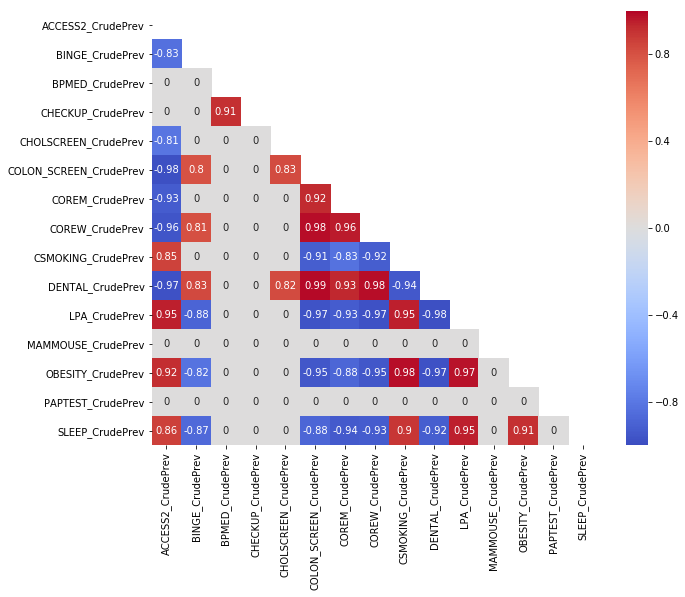

In [9]:
#Plotting the highly correlated variables and removing the duplicates

subjective_corr = corr.corr()
subjective_corr[np.abs(subjective_corr)<.8] = 0
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(subjective_corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

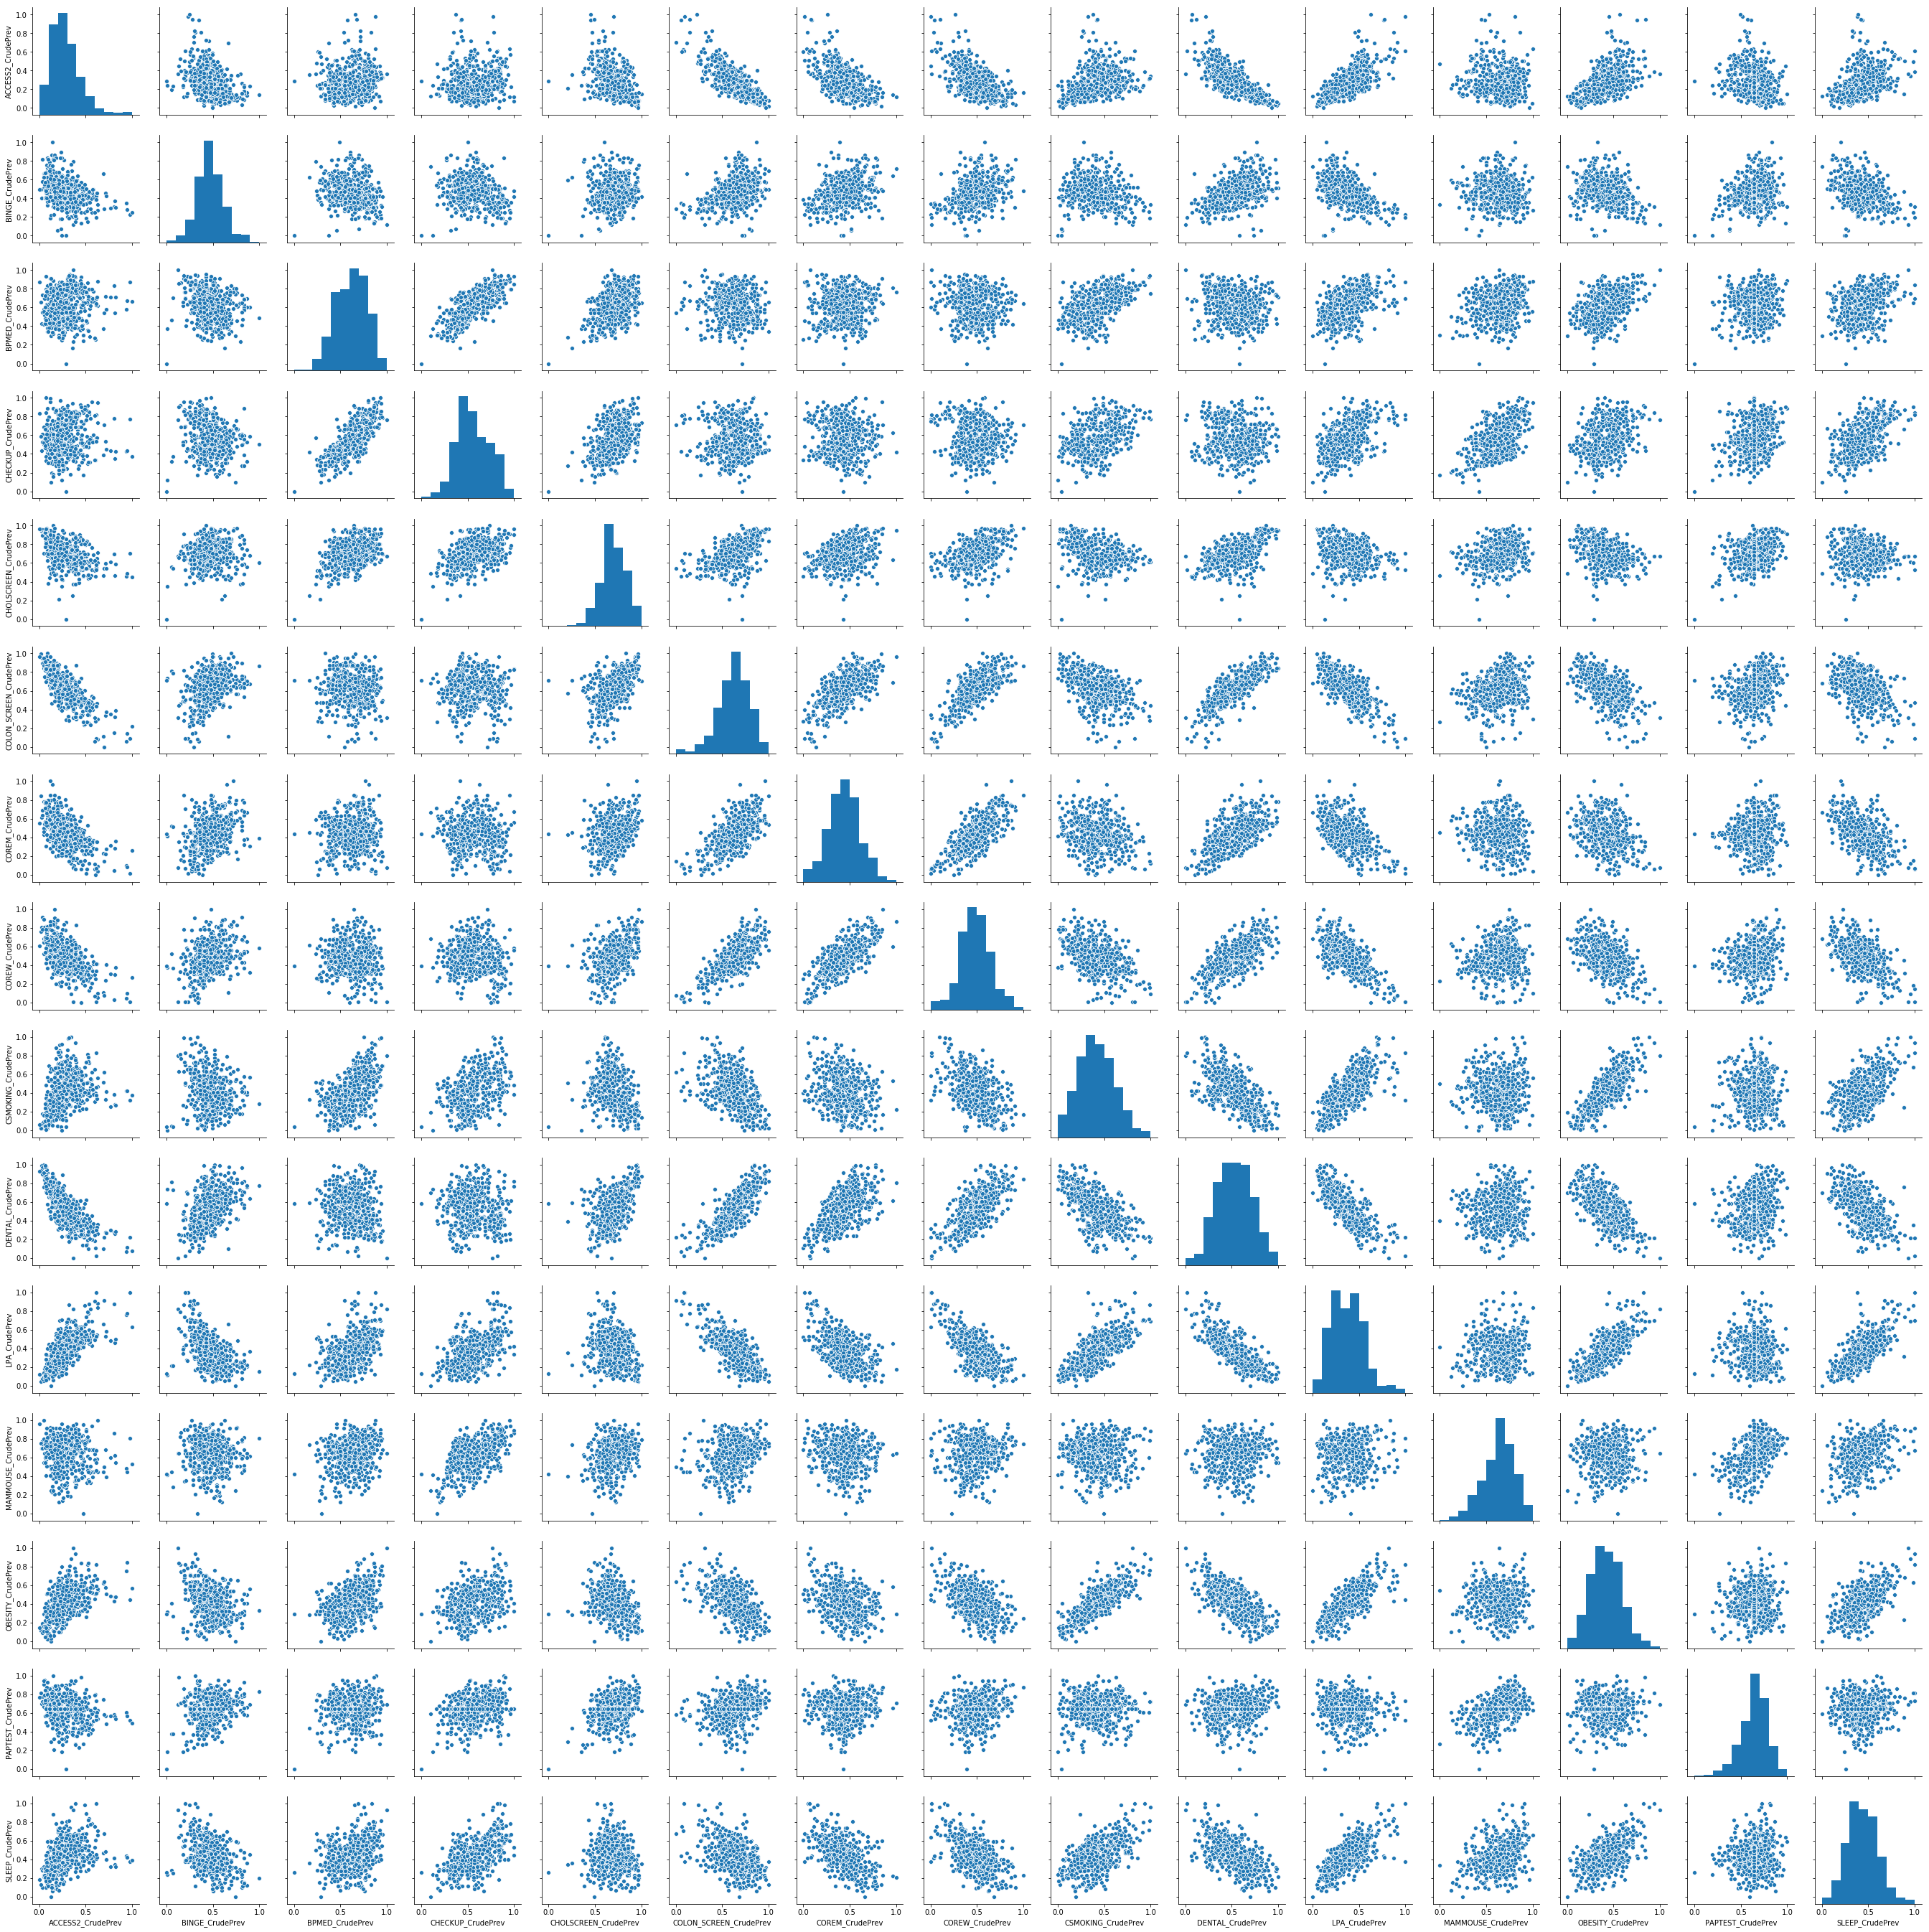

In [10]:
## Pairplot
dataset = df_new3[['ACCESS2_CrudePrev', 'BINGE_CrudePrev', 'BPMED_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev',
       'DENTAL_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'SLEEP_CrudePrev']]
g = sns.pairplot(dataset)

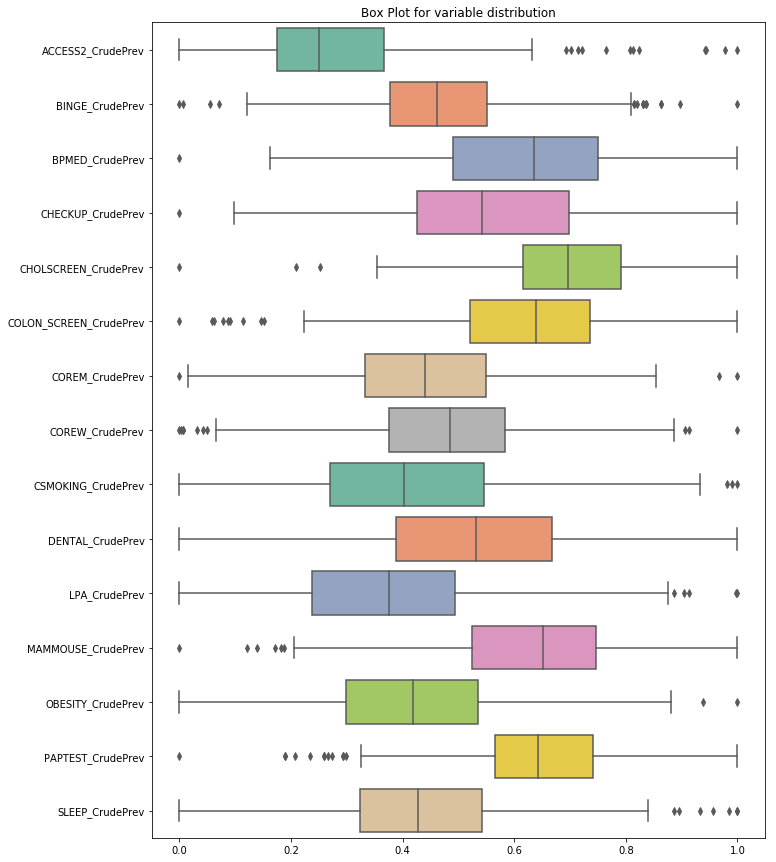

In [11]:
#Boxplot
f, ax = plt.subplots(figsize=(11, 15))

plt.title("Box Plot for variable distribution")
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = dataset, 
  orient = 'h', 
  palette = 'Set2')

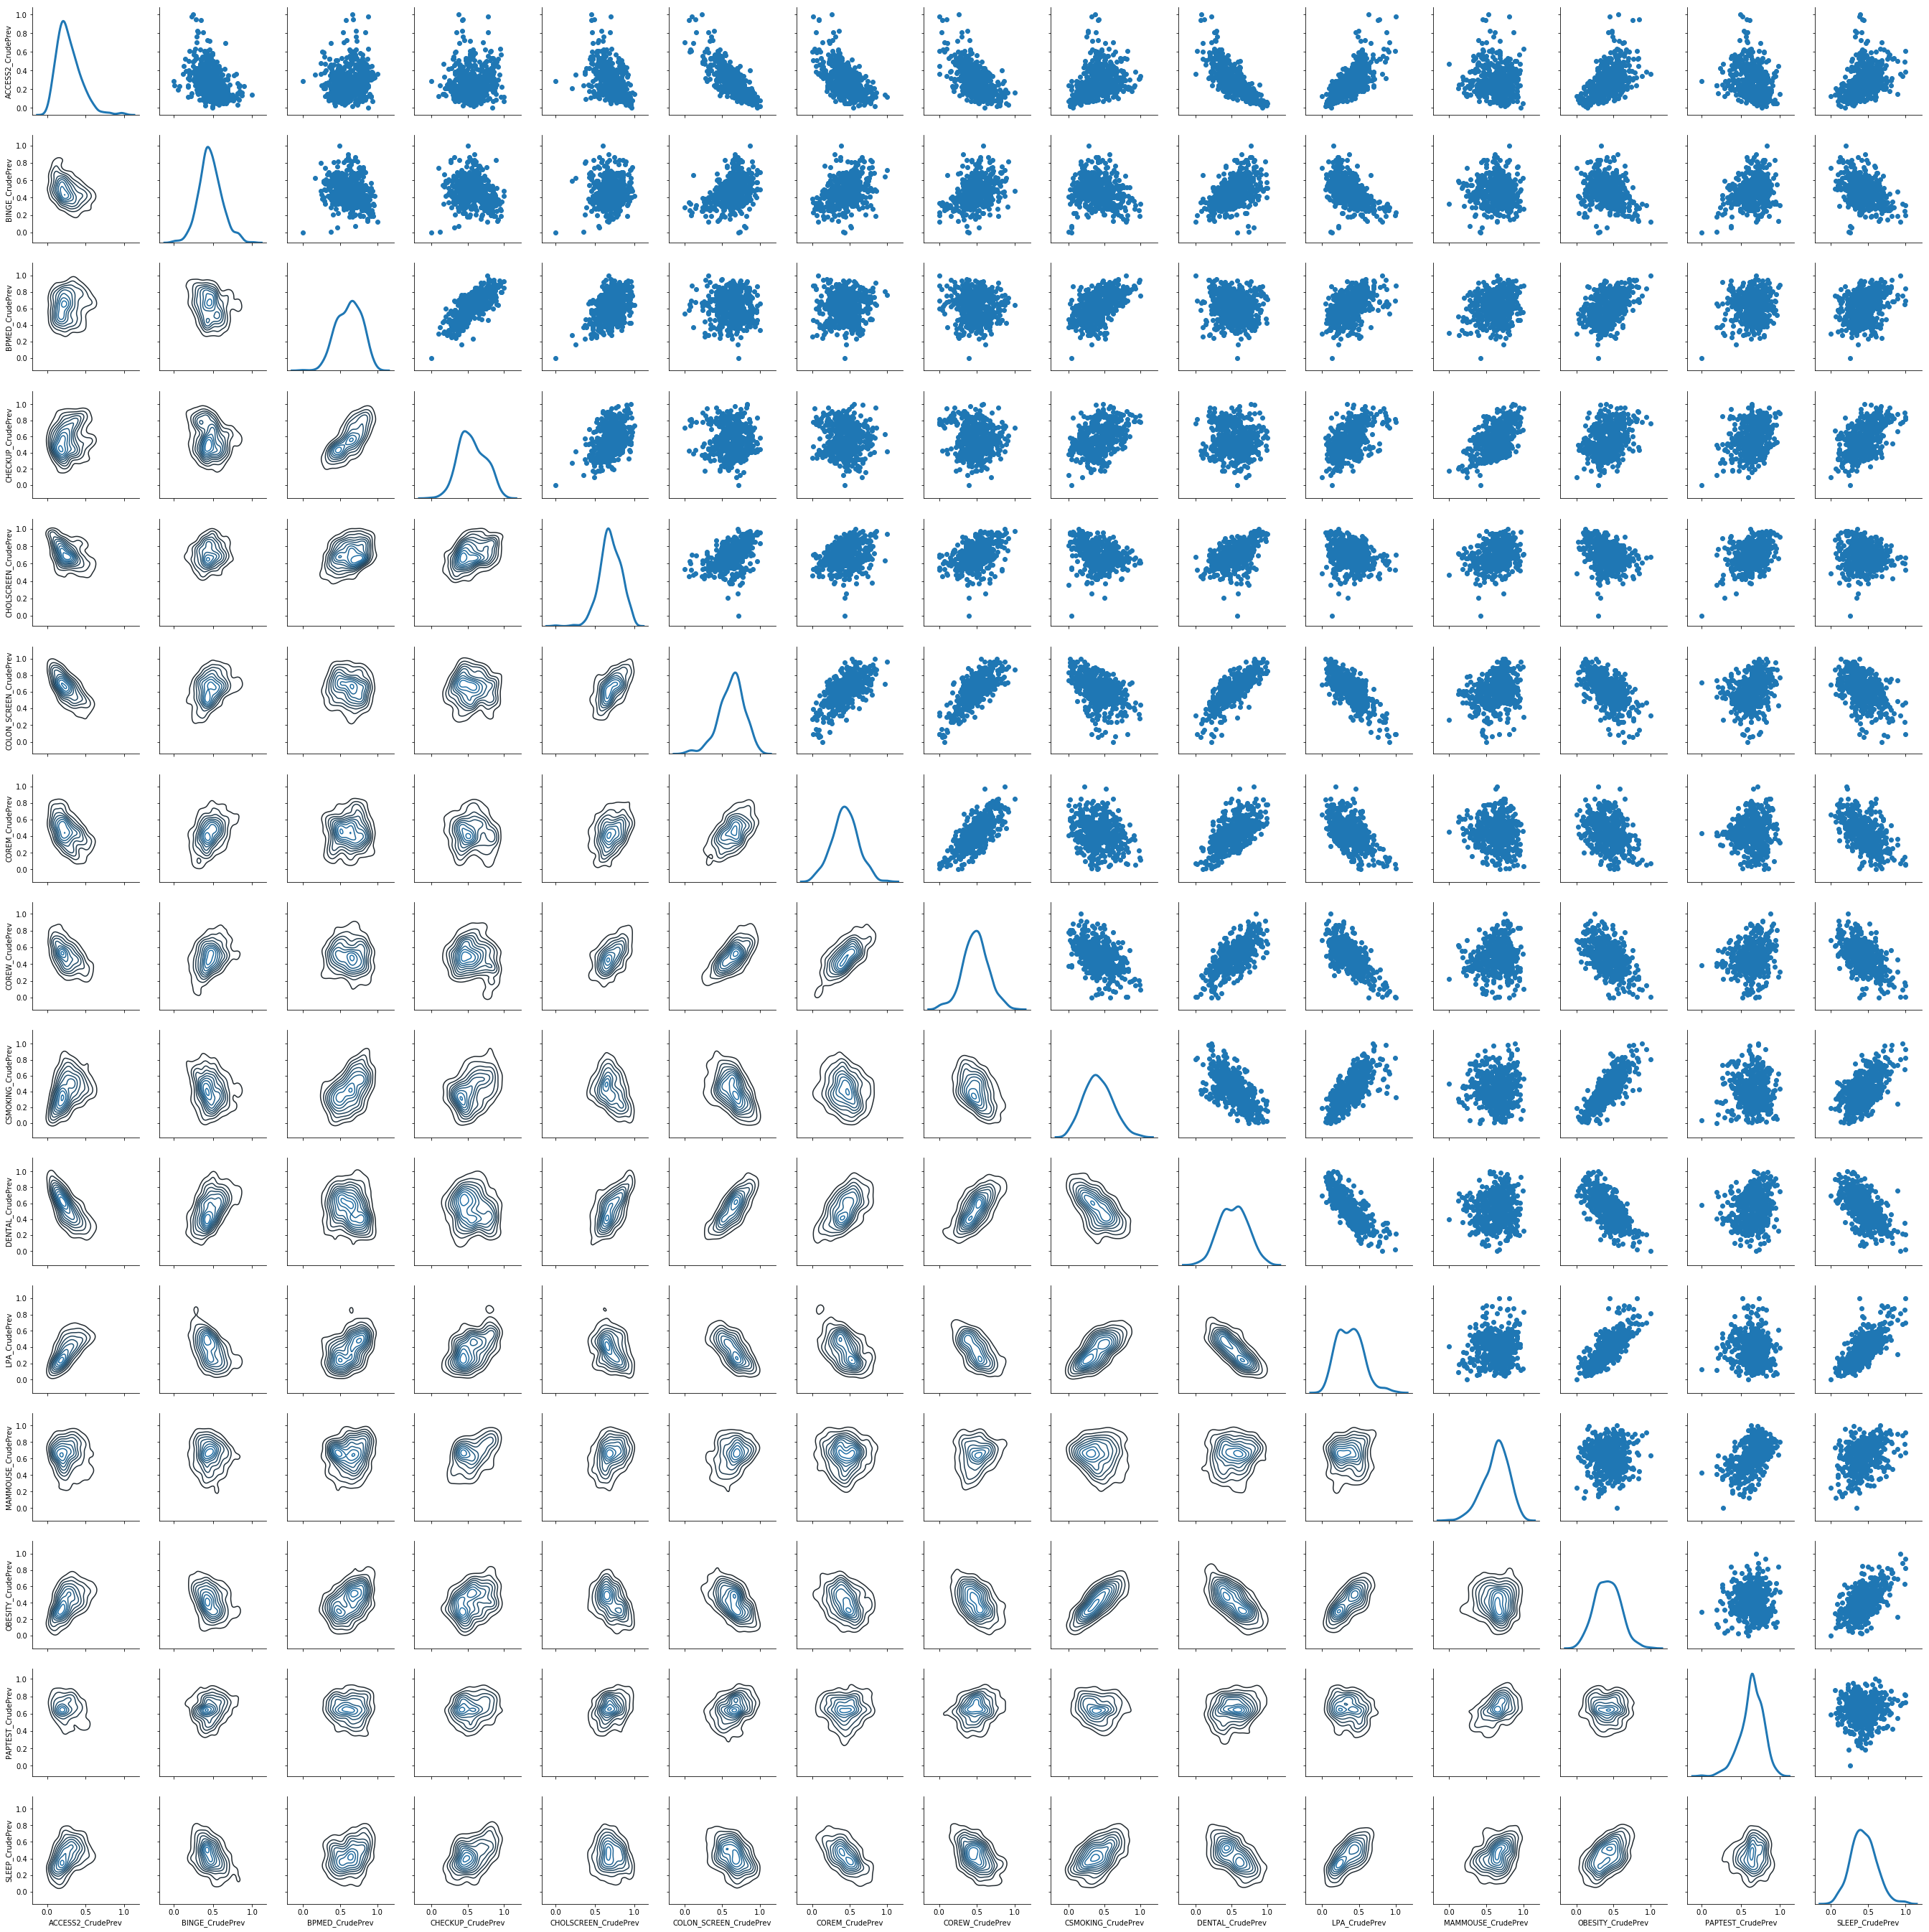

In [12]:
gi = sns.PairGrid(dataset)
gi.map_upper(plt.scatter)
gi.map_lower(sns.kdeplot)
gi.map_diag(sns.kdeplot, lw=3, legend=False);

## Feature Engineering

In [0]:
#Interactive terms
#1. LPA and Obesity might have some interaction with each other since LPA is one
#of the reason lead to obesity especially when 
#other lifestyles do not lead to obesity such as healthy diet.
df_new3['LPAandOBESITY']=df_new3['LPA_CrudePrev']*df_new3['OBESITY_CrudePrev']

#2. CoreM and CoreW might have some interaction with each other. Suppose each 
#variable has a similar relationship with the target,
#the interactive term can have  more information gathered based on genders.
df_new3['Core']=df_new3['COREM_CrudePrev']*df_new3['COREW_CrudePrev']

#Risk score
#Each of these variables may have different scale of impact on the outcome 
#variable. Since our target is cancer, we are going to
#give a higher risk score for CSMOKING_CrudePrev by take the double of it.
df_new3['CSMOKING_Double']=df_new3['CSMOKING_CrudePrev']*2

## Data Preparation

In [0]:
import random
random.seed(123)

In [15]:
from sklearn.utils import shuffle
df_new3 = shuffle(df_new3)
df_new3.head()

StateAbbr  PlaceName  PlaceFIPS  ...  LPAandOBESITY      Core  CSMOKING_Double
133        CA    Menifee     646842  ...       0.124480  0.210125         0.540284
440        MS    Jackson    2836000  ...       0.512198  0.087243         1.251185
52         IL  Champaign    1712385  ...       0.133682  0.270446         0.796209
201        GA      Macon    1349000  ...       0.649314  0.085125         1.620853
308        CO   Longmont     845970  ...       0.009202  0.363076         0.606635

[5 rows x 35 columns]

In [0]:
#Leave out the 10% test partition
df_model=df_new3.sample(frac=0.9)
df_test=df_new3.drop(df_model.index,axis=0)

In [0]:
from sklearn.model_selection import train_test_split
feature_cols=['ACCESS2_CrudePrev', 'BINGE_CrudePrev', 'BPMED_CrudePrev',
       'CHECKUP_CrudePrev', 'CHOLSCREEN_CrudePrev', 'COLON_SCREEN_CrudePrev',
       'COREM_CrudePrev', 'COREW_CrudePrev', 'CSMOKING_CrudePrev',
       'DENTAL_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev',
       'OBESITY_CrudePrev', 'PAPTEST_CrudePrev', 'SLEEP_CrudePrev','LPAandOBESITY','Core','CSMOKING_Double']
X=df_model[feature_cols].values
y=df_model['CANCER_CrudePrev'].values

X_test=df_test[feature_cols].values
y_test=df_test['CANCER_CrudePrev'].values

#Use the 90% of data for training and validation, then split them with training 80% and validation 10% of the dataset
val_size=len(df_new3)*0.1/len(df_model) #10% of the data is val_size of the training and validation partition
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=123)

## Model Fitting

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Model 0: Baseline model

In [0]:
from sklearn.dummy import DummyRegressor
#Create Dummy Regression Always Predicts The Mean Value Of Target
base = DummyRegressor(strategy='mean')
model0=base.fit(X_train, y_train)
y_train0=model0.predict(X_train)
y_val0=model0.predict(X_val)
y_test0=model0.predict(X_test)

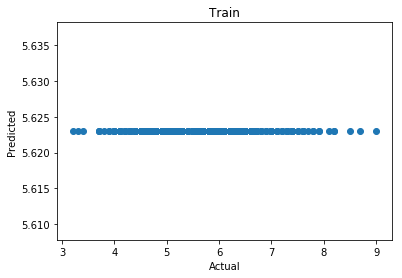

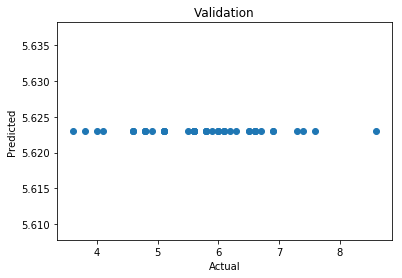

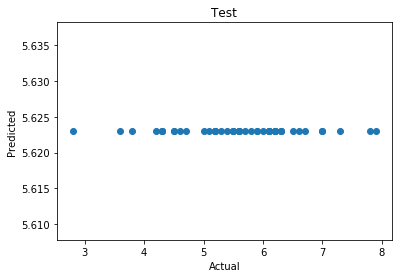

In [21]:
#Scaltter plots
#train
plt.scatter(y_train,y_train0)
plt.title('Train')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Validation
plt.scatter(y_val,y_val0)
plt.title('Validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Test
plt.scatter(y_test,y_test0)
plt.title('Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [22]:
  
#Error matrics calculation
#train
mae_train=mean_absolute_error(y_train, y_train0)
mape_train=mean_absolute_percentage_error(y_train, y_train0)
rmse_train=sqrt(mean_squared_error(y_train, y_train0))
sd_train=np.std(abs(y_train-y_train0))
bias_train=np.mean(y_train0-y_train)
#Validation
mae_val=mean_absolute_error(y_val, y_val0)
mape_val=mean_absolute_percentage_error(y_val, y_val0)
rmse_val=sqrt(mean_squared_error(y_val, y_val0))
sd_val=np.std(abs(y_val-y_val0))
bias_val=np.mean(y_val0-y_val)
#Test
mae_test=mean_absolute_error(y_test, y_test0)
mape_test=mean_absolute_percentage_error(y_test, y_test0)
rmse_test=sqrt(mean_squared_error(y_test, y_test0))
sd_test=np.std(abs(y_test-y_test0))
bias_test=np.mean(y_test0-y_test)

train=[mae_train,mape_train,rmse_train,sd_train,bias_train]
val=[mae_val,mape_val,rmse_val,sd_val,bias_val]
test=[mae_test,mape_test,rmse_test,sd_test,bias_test]

e_metrics=[train,val,test]

table=pd.DataFrame(e_metrics,columns =['MAE','MAPE','RMSE','SD(AE)','BIAS'])
table['index']=['Train','Validate','Test']
table.set_index('index',inplace=True)
table

MAE       MAPE      RMSE    SD(AE)          BIAS
index                                                          
Train     0.774305  14.241810  0.975613  0.593526 -6.561418e-16
Validate  0.789080  14.281704  1.007455  0.626353 -1.110000e-01
Test      0.786920  15.620550  1.020026  0.649007  1.700000e-02

In [0]:
#No variable importance for baseline model since we are taking the simple average of the target.

In [0]:
#No partial dependence for baseline model since we are taking the simple average of the target.

### Model 1: Random forest

In [0]:
scoring='neg_mean_squared_error'
#Take the range from 10 to 100 step by 10 as the number of estimators since we do not want only a few or too many to avoid
#underfitting or overfitting.
param_grid = dict(n_estimators=np.array([10,20,30,40,50,60,70,80,90,100]))
model = RandomForestRegressor(random_state=123)
kfold = KFold(n_splits=10, random_state=123)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model1=model.fit(X_train,y_train)
y_train1=model1.predict(X_train)
y_val1=model1.predict(X_val)
y_test1=model1.predict(X_test)

#Result shows that number of estimators equals to 70 gives the best result as a negative mean square error of -0.3029.

In [0]:
#Scaltter plots
#train
plt.scatter(y_train,y_train1)
plt.title('Train')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Validation
plt.scatter(y_val,y_val1)
plt.title('Validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Test
plt.scatter(y_test,y_test1)
plt.title('Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [0]:
#Error matrics calculation
#train
mae_train=mean_absolute_error(y_train, y_train1)
mape_train=mean_absolute_percentage_error(y_train, y_train1)
rmse_train=sqrt(mean_squared_error(y_train, y_train1))
sd_train=np.std(abs(y_train-y_train1))
bias_train=np.mean(y_train1-y_train)
#Validation
mae_val=mean_absolute_error(y_val, y_val1)
mape_val=mean_absolute_percentage_error(y_val, y_val1)
rmse_val=sqrt(mean_squared_error(y_val, y_val1))
sd_val=np.std(abs(y_val-y_val1))
bias_val=np.mean(y_val1-y_val)
#Test
mae_test=mean_absolute_error(y_test, y_test1)
mape_test=mean_absolute_percentage_error(y_test, y_test1)
rmse_test=sqrt(mean_squared_error(y_test, y_test1))
sd_test=np.std(abs(y_test-y_test1))
bias_test=np.mean(y_test1-y_test)

train=[mae_train,mape_train,rmse_train,sd_train,bias_train]
val=[mae_val,mape_val,rmse_val,sd_val,bias_val]
test=[mae_test,mape_test,rmse_test,sd_test,bias_test]

e_metrics=[train,val,test]

table=pd.DataFrame(e_metrics,columns =['MAE','MAPE','RMSE','SD(AE)','BIAS'])
table['index']=['Train','Validate','Test']
table.set_index('index',inplace=True)
table

In [0]:
#Variable importance
importances = model1.feature_importances_

# let's add a print statement to see what's going on
print("---------------------")
print("These are the importances...")
print(importances)
print("---------------------")
print(pd.DataFrame.head(df_model))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
X_plt=df_model[feature_cols]
names = [X_plt.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_plt.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_plt.shape[1]), names, rotation=90)

In [0]:
pip install pdpbox

In [0]:
#My top 3 important variables are BPMED, CHOLSCREEN and ACCESS2
#Partial dependency
data=pd.concat([df_model[feature_cols],df_model['CANCER_CrudePrev']],axis=1)
from pdpbox import pdp, get_dataset, info_plots
pdp11 = pdp.pdp_isolate(
    model=model1, dataset=data, model_features=feature_cols, feature='BPMED_CrudePrev')
fig, axes = pdp.pdp_plot(pdp11, 'BPMED_CrudePrev')
plt.show()
pdp12 = pdp.pdp_isolate(
    model=model1, dataset=data, model_features=feature_cols, feature='CHOLSCREEN_CrudePrev')
fig, axes = pdp.pdp_plot(pdp12, 'CHOLSCREEN_CrudePrev')
plt.show()
pdp13 = pdp.pdp_isolate(
    model=model1, dataset=data, model_features=feature_cols, feature='ACCESS2_CrudePrev')
fig, axes = pdp.pdp_plot(pdp13, 'ACCESS2_CrudePrev')
plt.show()

#Taking medicine for high blood pressure control and Cholesterol screen possitively affect having cancer, while
#having insurance negatively affect having cancer. And larger the scale of the feature, faster of the trend.

### Model2: GBM

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=123)
kfold = KFold(n_splits=10, random_state=123)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

model2=model.fit(X_train,y_train)
y_train2=model2.predict(X_train)
y_val2=model2.predict(X_val)
y_test2=model2.predict(X_test)

#Result shows that number of estimators equals to 200 gives the best result as a negative mean square error of -0.2786.

In [0]:
#Scaltter plots
#train
plt.scatter(y_train,y_train2)
plt.title('Train')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Validation
plt.scatter(y_val,y_val2)
plt.title('Validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Test
plt.scatter(y_test,y_test2)
plt.title('Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [0]:
#Error matrics calculation
#train
mae_train=mean_absolute_error(y_train, y_train2)
mape_train=mean_absolute_percentage_error(y_train, y_train2)
rmse_train=sqrt(mean_squared_error(y_train, y_train2))
sd_train=np.std(abs(y_train-y_train2))
bias_train=np.mean(y_train2-y_train)
#Validation
mae_val=mean_absolute_error(y_val, y_val2)
mape_val=mean_absolute_percentage_error(y_val, y_val2)
rmse_val=sqrt(mean_squared_error(y_val, y_val2))
sd_val=np.std(abs(y_val-y_val2))
bias_val=np.mean(y_val2-y_val)
#Test
mae_test=mean_absolute_error(y_test, y_test2)
mape_test=mean_absolute_percentage_error(y_test, y_test2)
rmse_test=sqrt(mean_squared_error(y_test, y_test2))
sd_test=np.std(abs(y_test-y_test2))
bias_test=np.mean(y_test2-y_test)

train=[mae_train,mape_train,rmse_train,sd_train,bias_train]
val=[mae_val,mape_val,rmse_val,sd_val,bias_val]
test=[mae_test,mape_test,rmse_test,sd_test,bias_test]
e_metrics=[train,val,test]

table2=pd.DataFrame(e_metrics,columns =['MAE','MAPE','RMSE','SD(AE)','BIAS'])
table2['index']=['Train','Validate','Test']
table2.set_index('index',inplace=True)
table2

In [0]:
#Variable importance
importances = model2.feature_importances_

# let's add a print statement to see what's going on
print("---------------------")
print("These are the importances...")
print(importances)
print("---------------------")
print(pd.DataFrame.head(df_model))
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
X_plt=df_model[feature_cols]
names = [X_plt.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_plt.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_plt.shape[1]), names, rotation=90)

In [0]:
#My top 3 important variables are BPMED, CHOLSCREEN and ACCESS2
#Partial dependency
data=pd.concat([df_model[feature_cols],df_model['CANCER_CrudePrev']],axis=1)
from pdpbox import pdp, get_dataset, info_plots
pdp11 = pdp.pdp_isolate(
    model=model2, dataset=data, model_features=feature_cols, feature='BPMED_CrudePrev')
fig, axes = pdp.pdp_plot(pdp11, 'BPMED_CrudePrev')
plt.show()
pdp12 = pdp.pdp_isolate(
    model=model2, dataset=data, model_features=feature_cols, feature='CHOLSCREEN_CrudePrev')
fig, axes = pdp.pdp_plot(pdp12, 'CHOLSCREEN_CrudePrev')
plt.show()
pdp13 = pdp.pdp_isolate(
    model=model2, dataset=data, model_features=feature_cols, feature='ACCESS2_CrudePrev')
fig, axes = pdp.pdp_plot(pdp13, 'ACCESS2_CrudePrev')
plt.show()

### Model 3: Neural network

In [0]:
from keras import models
from keras import layers

def build_model():

    model = models.Sequential()
    model.add(layers.Dense(15, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
k = 5
num_val_samples = len(X_train) // k
num_epochs = 10
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model3 = KerasRegressor(build_fn=build_model,batch_size=10,epochs=num_epochs)
    # Train the model (in silent mode, verbose=0)
    model3.fit(partial_train_data, partial_train_targets)

    
scoring='neg_mean_squared_error'
#Take the range from 5 to 30 step by 5 as the number of epochs.This runs very slow.
param_grid = dict(epochs=np.array([5,10,15,20,25,30]))
grid = GridSearchCV(estimator=model3, param_grid=param_grid,scoring=scoring)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

y_train3=model3.predict(X_train)
y_val3=model3.predict(X_val)
y_test3=model3.predict(X_test)

#Result shows that number of estimators equals to 30 gives the best result as a negative mean square error of -0.4770.

In [0]:
#Scaltter plots
#train
plt.scatter(y_train,y_train3)
plt.title('Train')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Validation
plt.scatter(y_val,y_val3)
plt.title('Validation')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
#Test
plt.scatter(y_test,y_test3)
plt.title('Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [0]:
#Error matrics calculation
#train
mae_train=mean_absolute_error(y_train, y_train3)
mape_train=mean_absolute_percentage_error(y_train, y_train3)
rmse_train=sqrt(mean_squared_error(y_train, y_train3))
sd_train=np.std(abs(y_train-y_train3))
bias_train=np.mean(y_train3-y_train)
#Validation
mae_val=mean_absolute_error(y_val, y_val3)
mape_val=mean_absolute_percentage_error(y_val, y_val3)
rmse_val=sqrt(mean_squared_error(y_val, y_val3))
sd_val=np.std(abs(y_val-y_val3))
bias_val=np.mean(y_val3-y_val)
#Test
mae_test=mean_absolute_error(y_test, y_test3)
mape_test=mean_absolute_percentage_error(y_test, y_test3)
rmse_test=sqrt(mean_squared_error(y_test, y_test3))
sd_test=np.std(abs(y_test-y_test3))
bias_test=np.mean(y_test3-y_test)

train=[mae_train,mape_train,rmse_train,sd_train,bias_train]
val=[mae_val,mape_val,rmse_val,sd_val,bias_val]
test=[mae_test,mape_test,rmse_test,sd_test,bias_test]

e_metrics=[train,val,test]

table=pd.DataFrame(e_metrics,columns =['MAE','MAPE','RMSE','SD(AE)','BIAS'])
table['index']=['Train','Validate','Test']
table.set_index('index',inplace=True)
table

## Analysis: Word Doc

In [0]:
df_new3.groupby(['StateAbbr','PlaceName']).mean().agg('CANCER_CrudePrev')
grouped=df_new3.groupby(['StateAbbr']).agg({'CANCER_CrudePrev':sum})
grouped.sort_values('CANCER_CrudePrev', ascending=False)